In [1]:
## ---- Partition Cell Set Network Heatmap Module Analysis ---- 0681.03.00
## Load Analysis Parameters (Parm1)
## Load Network Utilities
## Loop Through Each Partition and Perform Analysis as Follows:
## Load Partition Cell Set
## Plot Module Gene Heatmaps
## Expermiments in Heat Map Differential Expression Analysis, Using
## Monocle, GLM, DESeq2, and speedglm

In [3]:
## Create a Working Input and Output Data Directory, If Id Does Not Exist
parentdir <- '/gpfs/group/torkamani/devans/'
datdir <- paste(parentdir, 'CDC2', sep = '')
if (!file.exists(datdir)) {
    dir.create(datdir)
}
setwd(datdir)

In [4]:
## Read the parameters file
ps <- read.table(file = 'parms.txt', stringsAsFactors = FALSE, header = TRUE)

In [2]:
## Load Monocle3 and Seurat Libraries
# library(rlang)
library(monocle3)
library(Seurat)
library(dplyr)
library(magrittr)
library(ggplot2)
library(gridExtra)
library(Matrix)
library(rhdf5)
library(grid)
library(igraph)
library(corpcor)
library(fdrtool)
library(readxl)
library(mixOmics)
# library(DESeq2)

In [5]:
## Load modified version of Monocle 3 dot plot (adds as.ordered type)
source('~/code/CSC.Run2/0700.00.00.Carotid.SC.Utilities.01.r')

In [6]:
## Read the previously preprocessed downsampled cell set data object
down_stdycds <- readRDS(file = paste(ps$outdir,
            'Aggregated.downsampled.QC.NoDoublets.Repartitioned.rds', sep = ''))

In [7]:
## Build a gene short name to gene id (Ensembl) lookup
short2geneid <- fData(down_stdycds)@rownames
names(short2geneid) <- fData(down_stdycds)@listData$gene_short_name

In [8]:
## Build a gene id (Ensembl) to gene short name lookup
geneid2short <- fData(down_stdycds)@listData$gene_short_name
names(geneid2short) <- fData(down_stdycds)@rownames

In [9]:
## Create variables for how cells sets are organized
cellgrps <- c('healthy', 'diseased', 'healthy', 'diseased', 'healthy', 'diseased')
cellpats <- c('ID Number 1', 'ID Number 1', 'ID Number 2', 'ID Number 2', 'ID Number 3', 'ID Number 3')

In [10]:
## Define and Assign Cell Types
celltypes6 <- c('1-Macrophages',
                '2-Endothelial Cells',
                '3-VSMCs',
                '4-Natural Killer Cells',
                '5-Cytotoxic T Lymphocytes',
                '6-B Lymphocytes')

In [11]:
## Get the pairs of module genes from EC (1 and 36) and VSCM (13 and 31) networks
## Set the q-value Cutoff
diff_exp_qval_cut <- 0.05
## EC Genes First
ec_netmod_file <- paste(datdir, '/', ps$outdir, celltypes6[2],
                          '/Dense.20k.Network.Module.Genes.Rev1.txt', sep = '')
ec_netmod <- read.table(ec_netmod_file, header = TRUE, sep = '\t',
                          stringsAsFactors = FALSE, quote = '')[, c(1, 3:9)]
ec_modgenes1 <- ec_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 1) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)
ec_modgenes2 <- ec_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 2) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)
ec_modgenes6 <- ec_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 6) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)
ec_modgenes35 <- ec_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 35) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)
ec_modgenes36 <- ec_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 36) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)

ec_modgenes1_ids <- short2geneid[ec_modgenes1$gene_short_name]
ec_modgenes36_ids <- short2geneid[ec_modgenes36$gene_short_name]

ec_modgenes_1_36 <- c(ec_modgenes1$gene_short_name,
                      ec_modgenes36$gene_short_name)
ec_modgenes_1_36_ids <- short2geneid[ec_modgenes_1_36]

ec_modgenes_1_35_36 <- c(ec_modgenes1$gene_short_name,
                         ec_modgenes35$gene_short_name,
                         ec_modgenes36$gene_short_name)

ec_modgenes_1_2_6_35_36 <- c(ec_modgenes1$gene_short_name,
                         ec_modgenes2$gene_short_name, 
                         ec_modgenes6$gene_short_name, 
                         ec_modgenes35$gene_short_name,
                         ec_modgenes36$gene_short_name)

ec_modgenes_1_35_36_ids <-  short2geneid[ec_modgenes_1_35_36]
ec_modgenes_1_2_6_35_36_ids <-  short2geneid[ec_modgenes_1_2_6_35_36]


## VSMC Genes Seconds
vsmc_netmod_file <- paste(datdir, '/', ps$outdir, celltypes6[3],
                          '/Dense.20k.Network.Module.Genes.Rev1.txt', sep = '')
vsmc_netmod <- read.table(vsmc_netmod_file, header = TRUE, sep = '\t',
                          stringsAsFactors = FALSE, quote = '')[, c(1, 3:9)]
vsmc_modgenes9 <- vsmc_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 9) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)
vsmc_modgenes11 <- vsmc_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 11) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)
vsmc_modgenes13 <- vsmc_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 13) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)
vsmc_modgenes24 <- vsmc_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 24) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)
vsmc_modgenes28 <- vsmc_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 28) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)
vsmc_modgenes30 <- vsmc_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 30) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)
vsmc_modgenes31 <- vsmc_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 31) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)
vsmc_modgenes_13_31 <- c(vsmc_modgenes13$gene_short_name, vsmc_modgenes31$gene_short_name)
vsmc_modgenes13_ids <- short2geneid[vsmc_modgenes13$gene_short_name]
vsmc_modgenes31_ids <- short2geneid[vsmc_modgenes31$gene_short_name]
vsmc_modgenes_13_31_ids <- short2geneid[vsmc_modgenes_13_31]
vsmc_modgenes_11_30 <- c(vsmc_modgenes11$gene_short_name,
                         vsmc_modgenes30$gene_short_name)
vsmc_modgenes_11_35_ids <- short2geneid[vsmc_modgenes_11_30]

vsmc_modgenes_11_13_30_31 <- c(vsmc_modgenes11$gene_short_name,
                              vsmc_modgenes13$gene_short_name,
                              vsmc_modgenes30$gene_short_name,
                              vsmc_modgenes31$gene_short_name)

vsmc_modgenes_9_11_13_30_31 <- c(vsmc_modgenes9$gene_short_name,
                              vsmc_modgenes11$gene_short_name,
                              vsmc_modgenes13$gene_short_name,
                              vsmc_modgenes30$gene_short_name,
                              vsmc_modgenes31$gene_short_name)

vsmc_modgenes_9_11_13_24_28_30_31 <- c(vsmc_modgenes9$gene_short_name,
                              vsmc_modgenes11$gene_short_name,
                              vsmc_modgenes13$gene_short_name,
                              vsmc_modgenes24$gene_short_name,
                              vsmc_modgenes28$gene_short_name,
                              vsmc_modgenes30$gene_short_name,
                              vsmc_modgenes31$gene_short_name)

vsmc_modgenes_9_11_13_24_28_30_31_plus2 <- c(vsmc_modgenes_9_11_13_24_28_30_31, 'CCL4', 'IGKC')


vsmc_modgenes_11_13_30_31_ids <- short2geneid[vsmc_modgenes_11_13_30_31]
vsmc_modgenes_9_11_13_30_31_ids <- short2geneid[vsmc_modgenes_9_11_13_30_31] 
vsmc_modgenes_9_11_13_24_28_30_31_ids <- short2geneid[vsmc_modgenes_9_11_13_24_28_30_31] 
vsmc_modgenes_9_11_13_24_28_30_31_plus2_ids <- short2geneid[vsmc_modgenes_9_11_13_24_28_30_31_plus2] 

## These variables are the same as above
vsmc_modgenes_11_30a <- c('TMSB4X', 'FXYD5', 'MYH10', 'RAMP1', 'ANXA2',
                  'TSC22D3', 'F2R', 'SFRP4', 'ECM1', 'ABHD14A',
                  'JDP2', 'DDIT4', 'VAT1', 'ABLIM1', 'S100A10',
                  'ZNF385D', 'FRZB', 'MAP1B', 'ZNF385B', 'GAP43',
                  'PDE5A', 'PRSS35', 'CCDC68', 'SH3BGRL3', 'UXT',
                  'CDKN2C', 'LMO7', 'ENPP2', 'NDNF', 'MCUB', 'HTR2B',
                  'MBNL1-AS1', 'TBC1D12', 'PTN', 'IL17D', 'SFT2D1',
                  'IGSF10', 'BHLHE41', 'NUCKS1', 'HACD3', 'IL18',
                  'TPPP3', 'EMP3', 'CLIC2', 'ATF5', 'MSC-AS1', 'FBLN2',
                  'LTBP4', 'F10', 'FSTL1', 'FBN1', 'TNXB', 'PCOLCE2',
                  'PLAT', 'PLPP3', 'SLIT3', 'CD248', 'AKAP12', 'PLBD1',
                  'SEMA3C', 'MFAP5', 'C17orf58', 'METRNL', 'UGDH',
                  'HSD11B1', 'TGFBR3', 'TSKU', 'FLRT2', 'SEMA3B',
                  'PI16', 'RAB32', 'DCLK1', 'CD55', 'LINC01133',
                  'FGFR1', 'CSF1', 'SLC16A7', 'NT5E', 'ADAMTSL4',
                  'HTRA3', 'FAM177A1', 'C1QTNF3', 'PPP2R2A', 'GPC1',
                  'EBF2', 'AMOTL2', 'NTM', 'CMTM3', 'CADM3')
vsmc_modgenes_11_30a_ids <- short2geneid[vsmc_modgenes_11_30]

ec_modgenes_35a <- c('FEZ1', 'OLFM1', 'ARHGAP18', 'COL4A1', 'MEDAG', 'COL4A2',
             'PDGFD', 'IGFBP7', 'RGS3', 'PGF', 'ITGA6', 'MGLL', 'ACKR3',
             'ANGPT2', 'PLXNA4', 'EMCN', 'TIMP3', 'GSN', 'FILIP1', 'LAMB1',
             'ELK3', 'ARPC2', 'NES', 'MXD4', 'PLVAP', 'ESM1', 'CITED4',
             'TMED3', 'EIF4EBP1', 'RFLNB')
ec_modgenes_35a_ids <- short2geneid[ec_modgenes_35a]

In [12]:
## Read in Toms  list of genes for VSMC and EC Heatmaps (Response to Nature.Rejection)
VSMC_PNR_file <- 'PostNatureRejection.Updates/Updated.VSMC.Genes.Heatmap.csv'
VSMC_PNR_genes <- read.table(VSMC_PNR_file, header = FALSE, sep = '', stringsAsFactors = FALSE)[,1]
VSMC_group <- VSMC_PNR_genes[1]
VSMC_PNR_genes_ids <- short2geneid[VSMC_PNR_genes[2:length(VSMC_PNR_genes)]]
VSMC_PNR_genes <- geneid2short[VSMC_PNR_genes_ids]
VSMC_group

EC_PNR_file <- 'PostNatureRejection.Updates/Updated.EC.Genes.Heatmap.csv'
EC_PNR_genes <- read.table(EC_PNR_file, header = FALSE, sep = '', stringsAsFactors = FALSE)[,1]
EC_group <- EC_PNR_genes[1]
EC_PNR_genes_ids <- short2geneid[EC_PNR_genes[2:length(EC_PNR_genes)]]
EC_PNR_genes <- geneid2short[EC_PNR_genes_ids]
EC_group 

[1] "VSMC_Modules_2_9_11_30_13_31_24_28"

[1] "EC_Modules_1_35_and_36_2_6"

## VSMC Unknown Process (Modules_2_9_11_30_13_31_24_28)¶
### Updated code

In [13]:
## Get the Expression Set for VSMC Modules_2_9_11_30_13_31_24_28 genes
p <- 3
vsmc_bool <- (colData(down_stdycds)$assigned_cell_type == celltypes6[p])
vsmcmod_cds <- down_stdycds[fData(down_stdycds)@rownames %in% VSMC_PNR_genes_ids, vsmc_bool]
colData(vsmcmod_cds)$condtype <- paste('vsmc',
    c('hea', 'dis')[(colData(vsmcmod_cds)$condition == 'diseased') + 1], sep = '-')
## colData(vsmcmod_cds)$sidecolor[colData(vsmcmod_cds)$condtype == 'ec-dis'] <- 'red'
## colData(vsmcmod_cds)$sidecolor[colData(vsmcmod_cds)$condtype == 'ec-hea'] <- 'blue'
colData(vsmcmod_cds)$sidecolor[colData(vsmcmod_cds)$condtype == 'vsmc-dis'] <- 'orange'
colData(vsmcmod_cds)$sidecolor[colData(vsmcmod_cds)$condtype == 'vsmc-hea'] <- 'cyan'

## Down Sample
cttable <- table(colData(vsmcmod_cds)$sidecolor)
smallset <- min(cttable)
cells2keep <- NULL
set.seed(101)
for (cellset_col in names(cttable)) {
    cellsetrow <-  which(colData(vsmcmod_cds)$sidecolor == cellset_col)
    cells2keep <- c(cells2keep, sample(cellsetrow, smallset, replace = FALSE))
}
vsmcmod_cds <- vsmcmod_cds[, cells2keep] 

## Print the down sampled data set sizes
table(colData(vsmcmod_cds)$sidecolor)

## Get the expresion matrix
expdat_vsmcmod <- as.matrix(exprs(vsmcmod_cds))
rownames(expdat_vsmcmod) <- geneid2short[rownames(expdat_vsmcmod)] 

## Set up the output file names and plot titles
f1 <- '/Heatmap.VSMC.Mod2_9_11_30_13_31_24_28.Genes.comp.bin.comp.bin.down.OnOff2Plus.preclustered.Rev1.pdf'
f1 <- paste(datdir, '/', ps$outdir, celltypes6[p], f1, sep = '')
title1 <- 'VSMC Network Modules 2_9_11_30_13_31_24_28\nGenes, Cells Pre-Clustered'

f2 <- '/Heatmap.VSMC.ModMod2_9_11_30_13_31_24_28.Genes.comp.bin.comp.bin.down.OnOff2Plus.fullyclustered.Rev1.pdf'
f2 <- paste(datdir, '/', ps$outdir, celltypes6[p], f2, sep = '')
title2 <-  'VSMC Network Modules 2_9_11_30_13_31_24_28\nGenes, Cells Fully Clustered'

f3 <- '/DotPlot.VSMC.Mod2_9_11_30_13_31_24_28.Genes.Rev1.pdf'
f3 <- paste(datdir, '/', ps$outdir, celltypes6[p], f3, sep = '')

f4 <- '/Heatmap.VSMC.Mod2_9_11_30_13_31_24_28.Genes.comp.bin.comp.bin.down.OnOff2Plus.fullyclustered.cut.Rev1.pdf'
f4 <- paste(datdir, '/', ps$outdir, celltypes6[p], f4, sep = '')
title4 <-  'VSMC Network Modules 2_9_11_30_13_31_24_28\nGenes, Cells Fully Clustered with Cuts'

f5 <- '/DotPlot.VSMC.Mod2_9_11_30_13_31_24_28.Genes.cuts.Rev1.pdf'
f5 <- paste(datdir, '/', ps$outdir, celltypes6[p], f5, sep = '')

## Prepare for pre-clustering
vsmc_dw <- which(colData(vsmcmod_cds)$condtype == 'vsmc-dis')
vsmc_hw <- which(colData(vsmcmod_cds)$condtype == 'vsmc-hea')

## Transform the data
dims <- dim(expdat_vsmcmod)
expdatbo <- (expdat_vsmcmod > 1) * 1

## Set up clustering parameters
## Distance method, cluster method, heatmap color scheme, legend
distmeth <- c('binary', 'binary')
clustmeth = c('complete', 'complete')
my_palettebol <- colorRampPalette(c('#660066', 'yellow'))(n = 2)
legendlstbol <- list(legend = c('VSMC DIS', 'VSMC HEA'),
              col = c('orange', 'cyan'), title = 'Cell Types', cex = .7)

## Individually cluster the columns of the two cell sets
vsmc_dcim <- cim(expdatbo[, vsmc_dw], dist.method = distmeth, clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'col', save = 'pdf', name.save = 'temp.ready.to.delete',
    col.sideColors = colData(vsmcmod_cds)$sidecolor[vsmc_dw],
    symkey = FALSE)
vsmc_hcim <- cim(expdatbo[, vsmc_hw], dist.method = distmeth, clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'col', save = 'pdf', name.save = 'temp.ready.to.delete',
    col.sideColors = colData(vsmcmod_cds)$sidecolor[vsmc_hw],
    symkey = FALSE)

## The is the combined (concantenated) preclustered cell types
## which will are plotted with genes fully clustered (check plot)
parthclust <- c(colnames(vsmc_dcim$mat), colnames(vsmc_hcim$mat))
colornames <-colData(vsmcmod_cds)$sidecolor
names(colornames) <- colnames(expdatbo)

# # This is just a check plot to the screen
# cim(expdatbo[, parthclust], dist.method = distmeth, clust.method = clustmeth,
#     scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
#     color = my_palettebol, cluster = 'row', # save = 'pdf', name.save = 'temp.ready.to.delete',
#     col.sideColors = colornames[parthclust],
#     symkey = FALSE)

## Repeated from above, this time to a file
pdf(f1, width = 8, height = 30)
cim(expdatbo[, parthclust], dist.method = distmeth, clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'row', title = title1,
    col.sideColors = colornames[parthclust],
    symkey = FALSE)
dev.off()

## The is again the combined cell types, plotted with both genes and cells fully clustered
cim_save <- cim(expdatbo[, parthclust], dist.method = distmeth, clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'both', save = 'pdf', name.save = 'temp.ready.to.delete',
    col.sideColors = colornames[parthclust], 
    symkey = FALSE)

## This is a check plot to the screen and it should match the above plot perfectly
# cim(expdatbo[, colnames(cim_save$mat)], dist.method = distmeth, clust.method = clustmeth,
#     scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
#     color = my_palettebol, cluster = 'row', # save = 'pdf', name.save = 'temp.ready.to.delete',
#     col.sideColors = colornames[colnames(cim_save$mat)], 
#     symkey = FALSE)

## Repeated from above, this time to a file (make sure to cluster again to plot cell dendrogram)
pdf(f2, width = 8, height = 30)
cim(expdatbo[, parthclust], dist.method = distmeth, clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'both', title = title2,
    col.sideColors = colornames[parthclust], 
    symkey = FALSE)
dev.off()

specialglist <- short2geneid[cim_save$row.names]
pdf(f3, width = 2.75, height = 34)
plot_genes_by_group2(vsmcmod_cds,
                    axis_order = "group_marker",
                    specialglist,
                    group_cells_by = "condtype",
                    ordering_type = "as_ordered", 
                    max.size = 3,
                    norm_method = 'size_only',
                    scale_max = 3, scale_min = -3)
dev.off()

## Set up for plot with special cut regions
cim_o <- colnames(cim_save$mat)
cut0 <- 1
cut1 <- floor(length(cim_o) * 1.408 / 6.78125)
cut2 <- floor(length(cim_o) * 3.018 / 6.78125)
cut3 <- floor(length(cim_o) * 4.461 / 6.78125)
cut4 <- length(cim_o)
wcut1 <- which(colnames(expdatbo) %in% cim_o[cut0:cut1])
wcut2 <- which(colnames(expdatbo) %in% cim_o[(cut1 + 1):cut2])
wcut3 <- which(colnames(expdatbo) %in% cim_o[(cut2 + 1):cut3])
wcut4 <- which(colnames(expdatbo) %in% cim_o[(cut3 + 1):cut4])
wcuts <- c(wcut1, wcut2, wcut3, wcut4)
cell_subg_cols <- vector(mode = 'character', length = length(cim_o))
cell_subg_names <- vector(mode = 'character', length = length(cim_o))
cell_subg_cols[wcut1] <- '#404040' # '1gray'
cell_subg_names[wcut1] <- '1gray'
cell_subg_cols[wcut2] <- '#606060' # '2gray'
cell_subg_names[wcut2] <- '2gray'
cell_subg_cols[wcut3] <- '#808080' # '3gray'
cell_subg_names[wcut3] <- '3gray'
cell_subg_cols[wcut4] <- '#A0A0A0' # '4gray'
cell_subg_names[wcut4] <- '4gray'
names(cell_subg_cols) <- cim_o

## Plot the same fully clustered plot, this time without reclustering the cells,
# but coloring the horizontal color bar according to the cuts
pdf(f4, width = 8, height = 30)
cim_cells <- cim(expdatbo[, colnames(cim_save$mat)], dist.method = distmeth,
    clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'row', title = title4,
    col.sideColors = cell_subg_cols[wcuts],
    symkey = FALSE)
dev.off()

specialglist <- specialglist <- short2geneid[cim_save$row.names]
colData(vsmcmod_cds)$subgroups[wcuts] <- cell_subg_names[wcuts]
pdf(f5, width = 3.25, height = 34)
plot_genes_by_group2(vsmcmod_cds,
                    axis_order = "group_marker",
                    specialglist,
                    group_cells_by = "subgroups",
                    ordering_type = "as_ordered", 
                    max.size = 3,
                    norm_method = 'size_only',
                    scale_max = 3, scale_min = -3)
dev.off()

# Perform DE Analysis on the vsmc heatmat subgroup
f6 <- '/Diff.vsmc_group1.KeepFail.NoModels.txt'
f6 <- paste(datdir, '/', ps$outdir, celltypes6[p], f6, sep = '')
gene_vsmc_wcut1_fits_pat_cond_adj <- fit_models(vsmcmod_cds[, wcut1], cores = 4,
                                model_formula_str = "~patient + condition")
all_coef1 <- NULL
## Get the DE Coefficients
all_coef1 <- coefficient_table(gene_vsmc_wcut1_fits_pat_cond_adj)
# Extract the relavent data from the DE tables
condition_terms1 <- all_coef1 %>% filter(term == "conditionhealthy")
condition_termsb1 <- condition_terms1 %>% filter(status == 'OK')
write.table(condition_terms1[,c(1, 4:12)], f6, col.names = TRUE, row.names = FALSE)

f7 <- '/Diff.vsmc_group2.KeepFail.NoModels.txt'
f7 <- paste(datdir, '/', ps$outdir, celltypes6[p], f7, sep = '')
gene_vsmc_wcut2_fits_pat_cond_adj <- fit_models(vsmcmod_cds[, wcut2], cores = 4,
                                model_formula_str = "~patient + condition")
all_coef2 <- NULL
## Get the DE Coefficients
all_coef2 <- coefficient_table(gene_vsmc_wcut2_fits_pat_cond_adj)
# Extract the relavent data from the DE tables
condition_terms2 <- all_coef2 %>% filter(term == "conditionhealthy")
condition_termsb2 <- condition_terms2 %>% filter(status == 'OK')
write.table(condition_terms2[,c(1, 4:12)], f7, col.names = TRUE, row.names = FALSE)

f8 <- '/Diff.vsmc_group3.KeepFail.NoModels.txt'
f8 <- paste(datdir, '/', ps$outdir, celltypes6[p], f8, sep = '')
gene_vsmc_wcut3_fits_pat_cond_adj <- fit_models(vsmcmod_cds[, wcut3], cores = 4,
                                model_formula_str = "~patient + condition")
all_coef3 <- NULL
## Get the DE Coefficients
all_coef3 <- coefficient_table(gene_vsmc_wcut3_fits_pat_cond_adj)
# Extract the relavent data from the DE tables
condition_terms3 <- all_coef3 %>% filter(term == "conditionhealthy")
condition_termsb3 <- condition_terms3 %>% filter(status == 'OK')
write.table(condition_terms3[,c(1, 4:12)], f8, col.names = TRUE, row.names = FALSE)

f9 <- '/Diff.vsmc_group4.KeepFail.NoModels.txt'
f9 <- paste(datdir, '/', ps$outdir, celltypes6[p], f9, sep = '')
gene_vsmc_wcut4_fits_pat_cond_adj <- fit_models(vsmcmod_cds[, wcut4], cores = 4,
                                model_formula_str = "~patient + condition")
all_coef4 <- NULL
## Get the DE Coefficients
all_coef4 <- coefficient_table(gene_vsmc_wcut4_fits_pat_cond_adj)
# Extract the relavent data from the DE tables
condition_terms4 <- all_coef4 %>% filter(term == "conditionhealthy")
condition_termsb4 <- condition_terms4 %>% filter(status == 'OK')
write.table(condition_terms4[,c(1, 4:12)], f9, col.names = TRUE, row.names = FALSE)


  cyan orange 
  1223   1223 

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

In [15]:
hea <- which(colData(vsmcmod_cds)$condition == 'healthy')
dis <- which(colData(vsmcmod_cds)$condition == 'diseased')
colData(vsmcmod_cds)$subgrp_c <- 'null'
colData(vsmcmod_cds)$subgrp_c[intersect(wcut1, hea)] <- 'group1hea'
colData(vsmcmod_cds)$subgrp_c[intersect(wcut1, dis)] <- 'group1dis'
colData(vsmcmod_cds)$subgrp_c[intersect(wcut2, hea)] <- 'group2hea'
colData(vsmcmod_cds)$subgrp_c[intersect(wcut2, dis)] <- 'group2dis'
colData(vsmcmod_cds)$subgrp_c[intersect(wcut3, hea)] <- 'group3hea'
colData(vsmcmod_cds)$subgrp_c[intersect(wcut3, dis)] <- 'group3dis'
colData(vsmcmod_cds)$subgrp_c[intersect(wcut4, hea)] <- 'group4hea'
colData(vsmcmod_cds)$subgrp_c[intersect(wcut4, dis)] <- 'group4dis'

colData(vsmcmod_cds)$subgrp <- NA
colData(vsmcmod_cds)$subgrp[wcut1] <- 'group1'
colData(vsmcmod_cds)$subgrp[wcut2] <- 'group2'
colData(vsmcmod_cds)$subgrp[wcut3] <- 'group3'
colData(vsmcmod_cds)$subgrp[wcut4] <- 'group4'

colData(vsmcmod_cds)$subgrp1 <- NA
colData(vsmcmod_cds)$subgrp1 <- 'group1_minus'
colData(vsmcmod_cds)$subgrp1[wcut1] <- 'group1_plus'

colData(vsmcmod_cds)$subgrp12 <- NA
colData(vsmcmod_cds)$subgrp12 <- 'group12_minus'
colData(vsmcmod_cds)$subgrp1[c(wcut1, wcut2)] <- 'group12_plus'

colData(vsmcmod_cds)$subgrp_cont <- 0
colData(vsmcmod_cds)$subgrp_cont[wcut1] <- sum(colData(vsmcmod_cds)$subgrp_c ==
                            'group1dis')/sum(colData(vsmcmod_cds)$subgrp == 'group1')
colData(vsmcmod_cds)$subgrp_cont[wcut2] <- sum(colData(vsmcmod_cds)$subgrp_c ==
                            'group2dis')/sum(colData(vsmcmod_cds)$subgrp == 'group2')
colData(vsmcmod_cds)$subgrp_cont[wcut3] <- sum(colData(vsmcmod_cds)$subgrp_c ==
                            'group3dis')/sum(colData(vsmcmod_cds)$subgrp == 'group3')
colData(vsmcmod_cds)$subgrp_cont[wcut4] <- sum(colData(vsmcmod_cds)$subgrp_c ==
                            'group4dis')/sum(colData(vsmcmod_cds)$subgrp == 'group4')


In [ ]:
## Perform Group Level DE Analysis for Two cases Using ANOVA Like Comparison

In [94]:
## This is needed for compare_models to work
vsmcmod_cds <- detect_genes(vsmcmod_cds)

In [95]:
## Models under study               # Null Case
mod0 <- '~patient'
mod1 <- '~patient + subgrp'         # Case 1
mod2 <- '~patient + subgrp_cont'    # Case 2

In [96]:
## Perform Monocle 3 DE Analysis
family_type_sel <- 2
ft <- c('quasipoisson', 'negbinomial', 'gaussian', 'binomial', 'poisson')[family_type_sel]

gene_vsmc_fits_m0 <- fit_models(vsmcmod_cds, cores = 1, expression_family = ft,
                                model_formula_str = mod0) 
all_coef_m0 <- coefficient_table(gene_vsmc_fits_m0)

gene_vsmc_fits_m1 <- fit_models(vsmcmod_cds, cores = 1, expression_family = ft,
                                model_formula_str = mod1) 
all_coef_m1 <- coefficient_table(gene_vsmc_fits_m1)

gene_vsmc_fits_m2 <- fit_models(vsmcmod_cds, cores = 1, expression_family = ft,
                                model_formula_str = mod2) 
all_coef_m2 <- coefficient_table(gene_vsmc_fits_m2)

In [97]:
## Pick a gene
gene_num <- 1
gene_name <- as.character(gene_vsmc_fits_m0$gene_short_name[gene_num])
gene_name

[1] "ISG15"

In [98]:
all_coef_m0[(all_coef_m0$gene_short_name == gene_name), c(1:2, 5:13)]
all_coef_m1[(all_coef_m1$gene_short_name == gene_name), c(1:2, 5:13)]
all_coef_m2[(all_coef_m2$gene_short_name == gene_name), c(1:2, 5:13)]

gene_short_name,num_cells_expressed,status,term,estimate,std_err,test_val,p_value,normalized_effect,model_component,q_value
<fct>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
ISG15,542,OK,(Intercept),-0.83406959,0.09738388,-8.5647600,1.083012e-17,0.00000000,count,9.638803e-16
ISG15,542,OK,patientID Number 2,-0.06756887,0.15283609,-0.4421002,6.584167e-01,-0.09521308,count,1.000000e+00
ISG15,542,OK,patientID Number 3,-0.68880031,0.13428100,-5.1295442,2.904446e-07,-0.96189160,count,7.812958e-05


gene_short_name,num_cells_expressed,status,term,estimate,std_err,test_val,p_value,normalized_effect,model_component,q_value
<fct>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
ISG15,542,OK,(Intercept),-1.6212225,0.1722615,-9.411406,4.895450e-21,0.0000000,count,9.056583e-19
ISG15,542,OK,patientID Number 2,-0.2116639,0.1573355,-1.345303,1.785274e-01,-0.2890812,count,1.000000e+00
ISG15,542,OK,patientID Number 3,-0.6494978,0.1332129,-4.875638,1.084574e-06,-0.8748464,count,2.863276e-04
ISG15,542,OK,subgrpgroup2,0.8104637,0.1975404,4.102774,4.082262e-05,1.1301439,count,3.837326e-03
ISG15,542,OK,subgrpgroup3,1.2903204,0.1924564,6.704482,2.021227e-11,1.8102824,count,2.930779e-09
ISG15,542,OK,subgrpgroup4,0.7410344,0.1828139,4.053491,5.045885e-05,1.0322588,count,2.220189e-03


gene_short_name,num_cells_expressed,status,term,estimate,std_err,test_val,p_value,normalized_effect,model_component,q_value
<fct>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
ISG15,542,OK,(Intercept),-1.53430245,0.1577877,-9.7238385,2.386129e-22,0.00000000,count,4.438199e-20
ISG15,542,OK,patientID Number 2,-0.04275983,0.1513157,-0.2825869,7.774935e-01,-0.05889841,count,1.000000e+00
ISG15,542,OK,patientID Number 3,-0.67163781,0.1335939,-5.0274595,4.970203e-07,-0.90900612,count,1.346925e-04
ISG15,542,OK,subgrp_cont,1.26390793,0.2250354,5.6164843,1.948820e-08,1.77680905,count,1.091339e-06


In [99]:

## Fix the model (Monocle Bug)
id <- short2geneid[gene_vsmc_fits_m0$gene_short_name][gene_num]
m0 <- cbind(id, gene_vsmc_fits_m0[gene_num, ])
m1 <- cbind(id, gene_vsmc_fits_m1[gene_num, ])
m2 <- cbind(id, gene_vsmc_fits_m2[gene_num, ])

In [101]:
## Similar to glm summary function
evaluate_fits(m0[gene_num,])[c(1:3,6:13)]
evaluate_fits(m1[gene_num,])[c(1:3,6:13)]
evaluate_fits(m2[gene_num,])[c(1:3,6:13)]

id,gene_short_name,num_cells_expressed,status,null_deviance,df_null,logLik,AIC,BIC,deviance,df_residual
<fct>,<fct>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
ENSG00000259768,ISG15,542,OK,1186.942,2445,-1644.164,3296.329,3296.329,1155.788,2443


id,gene_short_name,num_cells_expressed,status,null_deviance,df_null,logLik,AIC,BIC,deviance,df_residual
<fct>,<fct>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
ENSG00000259768,ISG15,542,OK,1242.993,2445,-1621.304,3256.609,3256.609,1163.066,2440


id,gene_short_name,num_cells_expressed,status,null_deviance,df_null,logLik,AIC,BIC,deviance,df_residual
<fct>,<fct>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
ENSG00000259768,ISG15,542,OK,1222.071,2445,-1628.915,3267.83,3267.83,1158.788,2442


In [107]:
multicomp.1.0 <- compare_models(m1, m0)
multicomp.2.0 <- compare_models(m2, m0)

In [108]:
## Compare models (similar to glm anova function)
multicomp.1.0[gene_num,]
multicomp.2.0[gene_num,]

id,gene_short_name,num_cells_expressed,p_value,q_value
<fct>,<fct>,<int>,<dbl>,<dbl>
ENSG00000259768,ISG15,542,6.505182e-10,2.211762e-08


id,gene_short_name,num_cells_expressed,p_value,q_value
<fct>,<fct>,<int>,<dbl>,<dbl>
ENSG00000259768,ISG15,542,3.340341e-08,1.770381e-06


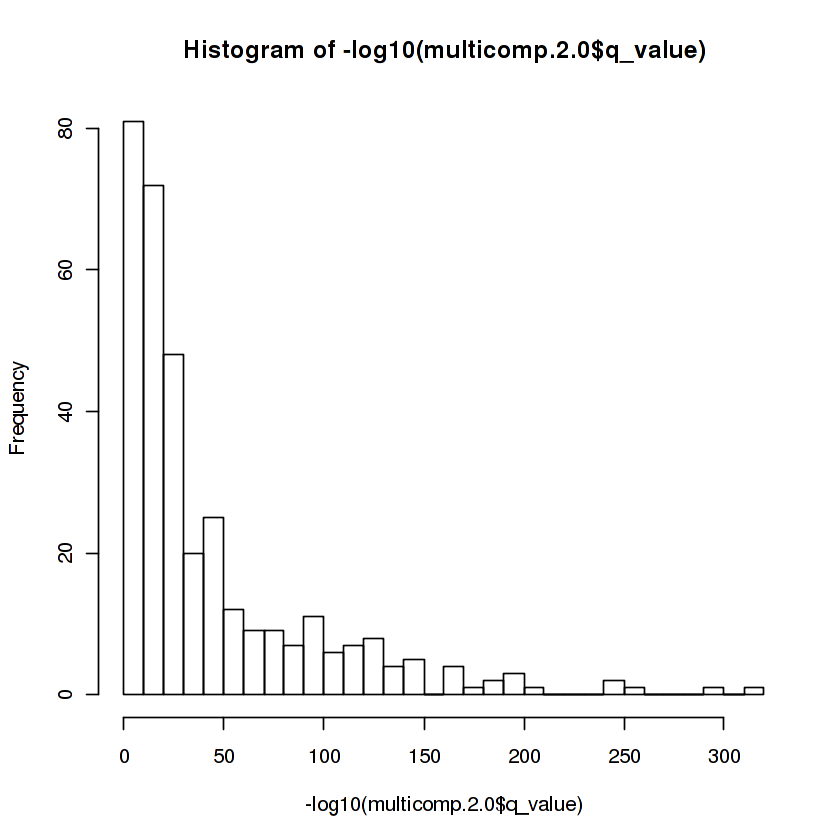

In [118]:
hist(-log10(multicomp.2.0$q_value), breaks = 40)

In [119]:
sum(all_coef_m2$gene_short_name == short2geneid[gene_vsmc_fits_m2$gene_short_name])

[1] NA

In [128]:
all_coef_m2[1:4, c(1,2,5,6,7,8) ]
all_coef_m2$gene_short_name[1:4]

gene_short_name,num_cells_expressed,status,term,estimate,std_err
<fct>,<int>,<chr>,<chr>,<dbl>,<dbl>
ISG15,542,OK,(Intercept),-1.53430245,0.1577877
ISG15,542,OK,patientID Number 2,-0.04275983,0.1513157
ISG15,542,OK,patientID Number 3,-0.67163781,0.1335939
ISG15,542,OK,subgrp_cont,1.26390793,0.2250354


[1] ISG15 ISG15 ISG15 ISG15
33514 Levels: A1BG A1BG-AS1 A1CF A2M A2M-AS1 A2ML1 A2ML1-AS1 A2ML1-AS2 ... ZZEF1

In [89]:
eGENE <- exprs(vsmcmod_cds)[gene_num,]
# eGENE <- scale(eGENE)
eGENE <- as.data.frame(eGENE, stringsAsFactors = FALSE)
as.character(geneid2short[rownames(vsmcmod_cds)[gene_num]])

[1] "ISG15"

In [90]:
GENE <- as.data.frame(cbind(eGENE, colData(vsmcmod_cds)$patient,
                             colData(vsmcmod_cds)$condition,
                             colData(vsmcmod_cds)$subgrp,
                             colData(vsmcmod_cds)$subgrp_cont))
GENE[, 1] <- as.numeric(GENE[, 1])
colnames(GENE) <- c('eGENE', 'patient', 'condition', 'subgrp', 'subgrp_cont')
head(GENE)

,eGENE,patient,condition,subgrp,subgrp_cont
,<dbl>,<fct>,<fct>,<fct>,<dbl>
TTAGTCTTCGAGAACG-1,0,ID Number 1,healthy,group4,0.722819594
AGACCCGGTATCCTCC-1,1,ID Number 1,healthy,group1,0.007889546
CAAGAGGGTGGAAATT-5,0,ID Number 3,healthy,group4,0.722819594
ACTGCAACACCAATTG-5,0,ID Number 3,healthy,group1,0.007889546
GTATTTCTCCGAGAAG-1,0,ID Number 1,healthy,group3,0.717850288
TATTTCGAGTACCCTA-1,1,ID Number 1,healthy,group1,0.007889546


In [91]:
## Try using GLM on the same models (family type is selected independently)
family_type_sel2 <- 5
ft2 <- c('quasipoisson', 'negbinomial', 'gaussian', 'binomial', 'poisson')[family_type_sel2]
GENE_mod0 <- glm(paste(eGENE, mod0), data = GENE, family = ft2)
GENE_mod1 <- glm(paste(eGENE, mod1), data = GENE, family = ft2)
GENE_mod2 <- glm(paste(eGENE, mod2), data = GENE, family = ft2)
summary(GENE_mod0)
summary(GENE_mod1)
summary(GENE_mod2)


Call:
glm(formula = paste(eGENE, mod0), family = ft2, data = GENE)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0968  -0.9961  -0.7244  -0.7244  12.7600  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -0.70091    0.05096 -13.753   <2e-16 ***
patientID Number 2  0.19254    0.07526   2.558   0.0105 *  
patientID Number 3 -0.63693    0.07730  -8.239   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 3734.2  on 2445  degrees of freedom
Residual deviance: 3610.0  on 2443  degrees of freedom
AIC: 4876.6

Number of Fisher Scoring iterations: 6



Call:
glm(formula = paste(eGENE, mod1), family = ft2, data = GENE)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4915  -0.8752  -0.6551  -0.5522  11.0962  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -1.30166    0.10673 -12.195  < 2e-16 ***
patientID Number 2  0.05152    0.07811   0.660  0.50951    
patientID Number 3 -0.57916    0.07750  -7.473 7.87e-14 ***
subgrpgroup2        0.34188    0.12436   2.749  0.00597 ** 
subgrpgroup3        1.35650    0.11030  12.299  < 2e-16 ***
subgrpgroup4        0.31492    0.11801   2.669  0.00762 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 3734.2  on 2445  degrees of freedom
Residual deviance: 3324.7  on 2440  degrees of freedom
AIC: 4597.4

Number of Fisher Scoring iterations: 6



Call:
glm(formula = paste(eGENE, mod2), family = ft2, data = GENE)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2468  -1.0121  -0.8166  -0.5063  12.3338  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -1.46552    0.10041 -14.596  < 2e-16 ***
patientID Number 2  0.24016    0.07555   3.179  0.00148 ** 
patientID Number 3 -0.59954    0.07735  -7.751 9.09e-15 ***
subgrp_cont         1.34673    0.14256   9.447  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 3734.2  on 2445  degrees of freedom
Residual deviance: 3506.0  on 2442  degrees of freedom
AIC: 4774.6

Number of Fisher Scoring iterations: 6


In [92]:
## ANOVA on GLM's it not as nice as linear models
anova(GENE_mod0, GENE_mod1)
anova(GENE_mod0, GENE_mod2)

,Resid. Df,Resid. Dev,Df,Deviance
,<dbl>,<dbl>,<dbl>,<dbl>
1,2443,3609.980,NA,NA
2,2440,3324.743,3,285.2371


,Resid. Df,Resid. Dev,Df,Deviance
,<dbl>,<dbl>,<dbl>,<dbl>
1,2443,3609.980,NA,NA
2,2442,3505.974,1,104.0063


In [50]:
## Try simple linear models
GENE_lmod0 <- lm(paste(eGENE, mod0), data = GENE)
GENE_lmod1 <- lm(paste(eGENE, mod1), data = GENE)
GENE_lmod2 <- lm(paste(eGENE, mod2), data = GENE)
summary(GENE_lmod0)
summary(GENE_lmod1)
summary(GENE_lmod2)


Call:
lm(formula = paste(eGENE, mod0), data = GENE)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6015 -0.4961 -0.2624 -0.2624 26.5039 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.49613    0.04482  11.070  < 2e-16 ***
patientID Number 2  0.10534    0.06989   1.507    0.132    
patientID Number 3 -0.23372    0.05823  -4.014 6.16e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.249 on 2443 degrees of freedom
Multiple R-squared:  0.01301,	Adjusted R-squared:  0.0122 
F-statistic:  16.1 on 2 and 2443 DF,  p-value: 1.132e-07



Call:
lm(formula = paste(eGENE, mod1), data = GENE)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0118 -0.3965 -0.1843 -0.1105 26.0381 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.32270    0.06650   4.853 1.29e-06 ***
patientID Number 2  0.04988    0.07167   0.696 0.486480    
patientID Number 3 -0.21221    0.05737  -3.699 0.000221 ***
subgrpgroup2        0.06066    0.07752   0.782 0.434037    
subgrpgroup3        0.63920    0.07770   8.226 3.11e-16 ***
subgrpgroup4        0.07378    0.06911   1.068 0.285799    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.226 on 2440 degrees of freedom
Multiple R-squared:  0.04976,	Adjusted R-squared:  0.04781 
F-statistic: 25.55 on 5 and 2440 DF,  p-value: < 2.2e-16



Call:
lm(formula = paste(eGENE, mod2), data = GENE)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6965 -0.5635 -0.3650 -0.0579 26.4197 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.27191    0.06461   4.208 2.66e-05 ***
patientID Number 2  0.11412    0.06960   1.640 0.101211    
patientID Number 3 -0.21744    0.05807  -3.745 0.000185 ***
subgrp_cont         0.42955    0.08952   4.799 1.69e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.243 on 2442 degrees of freedom
Multiple R-squared:  0.02223,	Adjusted R-squared:  0.02103 
F-statistic:  18.5 on 3 and 2442 DF,  p-value: 7.197e-12


In [51]:
## ANOVA on linear models is more comprehensive
anova(GENE_lmod0, GENE_lmod1)
anova(GENE_lmod0, GENE_lmod2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2443,3808.233,NA,NA,NA,NA
2,2440,3666.446,3,141.7879,31.45302,6.056283e-20


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2443,3808.233,NA,NA,NA,NA
2,2442,3772.661,1,35.57257,23.02572,1.694884e-06


[1] 0.4116926

[1] 1.578088

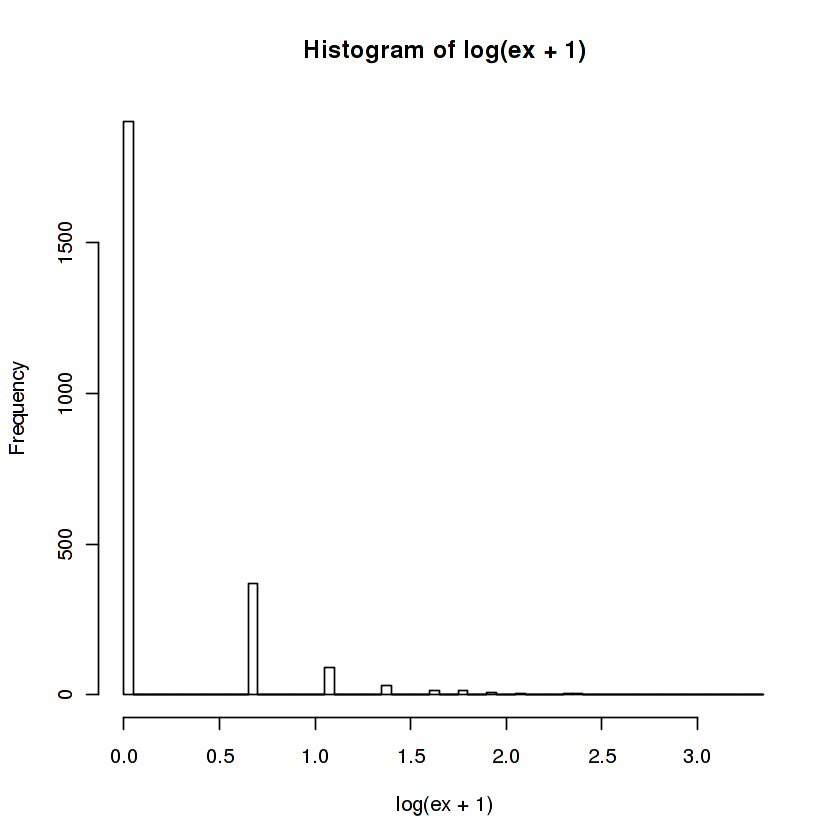

In [53]:
## Curious to Look at some of genes expression distribution
ex <- exprs(vsmcmod_cds)[1,]
hist(log(ex + 1), breaks = 100)
adj <- var(ex)/mean(ex)
# ex <- ex / adj
mean(ex)
var(ex)


ID Number 1 ID Number 2 ID Number 3 
        776         542        1128 


diseased  healthy 
    1223     1223 


group1 group2 group3 group4 
   507    581    521    837 

             
              diseased healthy
  ID Number 1      293     483
  ID Number 2      270     272
  ID Number 3      660     468

        
         diseased healthy
  group1        4     503
  group2      240     341
  group3      374     147
  group4      605     232

[1] 0.007889546 0.413080895 0.717850288 0.722819594

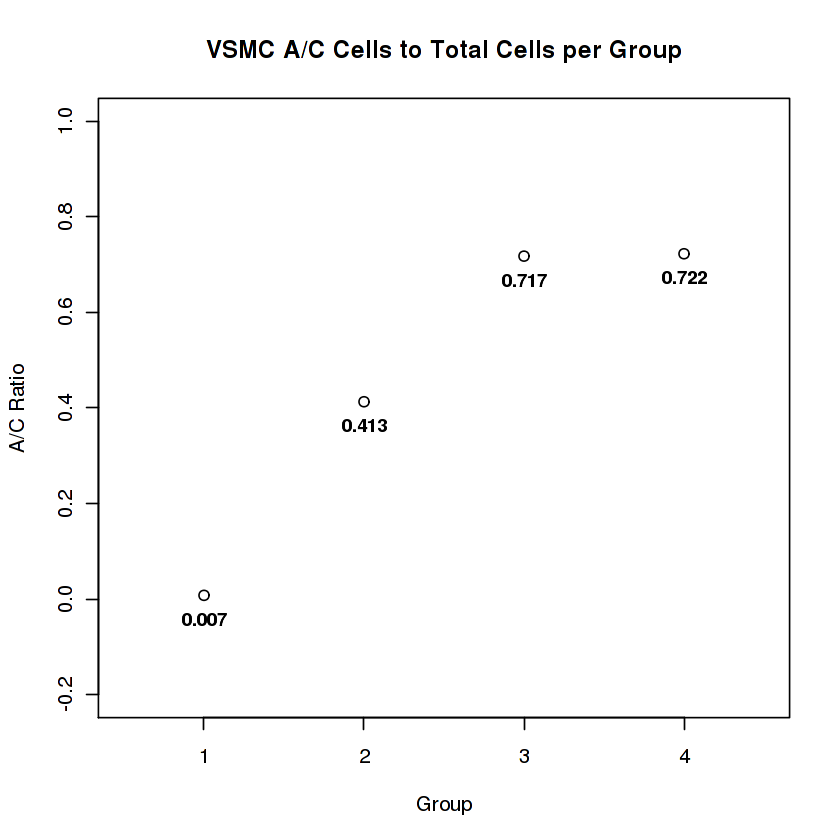

In [82]:
## Display some useful data
table(GENE$patient)
table(GENE$condition)
table(GENE$subgrp)
table(GENE$patient, GENE$condition)
table(GENE$subgrp, GENE$condition)
as.numeric(names(table(GENE$subgrp_cont)))
plot(x = 1:4, as.numeric(names(table(GENE$subgrp_cont))),
     xlab = 'Group', ylab = "A/C Ratio", xlim = c(.5,4.5), ylim = c(-.2,1),
    main = 'VSMC A/C Cells to Total Cells per Group')
text(x = 1:4, as.numeric(names(table(GENE$subgrp_cont))) - .05,
     labels=substr(names(table(GENE$subgrp_cont)), 1, 5), cex=0.9, font=2)

In [57]:
## DESeq2 Example Code using Pasilla data (From DESeq paper)
library("pasilla")
pasCts <- system.file("extdata", "pasilla_gene_counts.tsv", package="pasilla", mustWork=TRUE)
pasAnno <- system.file("extdata", "pasilla_sample_annotation.csv", package="pasilla", mustWork=TRUE)
cts <- as.matrix(read.csv(pasCts,sep="\t",row.names="gene_id"))
coldata <- read.csv(pasAnno, row.names=1)
coldata <- coldata[, c("condition","type")]
coldata$condition <- factor(coldata$condition)
coldata$type <- factor(coldata$type)

In [58]:
## From DESeq paper
rownames(coldata) <- sub("fb", "", rownames(coldata)) 
all(rownames(coldata) %in% colnames(cts)) 
all(rownames(coldata) == colnames(cts)) 
cts <- cts[, rownames(coldata)] 
all(rownames(coldata) == colnames(cts))

[1] TRUE

[1] FALSE

[1] TRUE

In [59]:
## From DESeq paper
dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = coldata,
                              design = ~ condition)
dds

class: DESeqDataSet 
dim: 14599 7 
metadata(1): version
assays(1): counts
rownames(14599): FBgn0000003 FBgn0000008 ... FBgn0261574 FBgn0261575
rowData names(0):
colnames(7): treated1 treated2 ... untreated3 untreated4
colData names(2): condition type

In [60]:
## From DESeq paper
head(dds)

class: DESeqDataSet 
dim: 6 7 
metadata(1): version
assays(1): counts
rownames(6): FBgn0000003 FBgn0000008 ... FBgn0000017 FBgn0000018
rowData names(0):
colnames(7): treated1 treated2 ... untreated3 untreated4
colData names(2): condition type

In [61]:
## From DESeq paper
featureData <- data.frame(gene=rownames(cts)) 
mcols(dds) <- DataFrame(mcols(dds), featureData) 
mcols(dds)

DataFrame with 14599 rows and 1 column
                   gene
               <factor>
FBgn0000003 FBgn0000003
FBgn0000008 FBgn0000008
FBgn0000014 FBgn0000014
FBgn0000015 FBgn0000015
FBgn0000017 FBgn0000017
...                 ...
FBgn0261571 FBgn0261571
FBgn0261572 FBgn0261572
FBgn0261573 FBgn0261573
FBgn0261574 FBgn0261574
FBgn0261575 FBgn0261575

In [62]:
## From DESeq paper
dds <- DESeq(dds)
res <- results(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [289]:
## From DESeq paper
res[2,]

log2 fold change (MLE): condition untreated vs treated 
Wald test p-value: condition untreated vs treated 
DataFrame with 1 row and 6 columns
                    baseMean       log2FoldChange             lfcSE
                   <numeric>            <numeric>         <numeric>
FBgn0000008 95.1440789963134 -0.00215142369233378 0.223883804763692
                            stat            pvalue              padj
                       <numeric>         <numeric>         <numeric>
FBgn0000008 -0.00960955480725635 0.992332802585979 0.996927101169797

In [68]:
help(speedglm)

## EC Unknown Process (Modules_1_35_and_36_2_6)
### Updated code

In [64]:
## Get the Expression Set for EC 1, 2, 6, 35, 36 DE Genes
p <- 2
ec_bool <- (colData(down_stdycds)$assigned_cell_type == celltypes6[p])
ecmod_cds <- down_stdycds[fData(down_stdycds)@rownames %in% ec_modgenes_1_2_6_35_36_ids, ec_bool]
colData(ecmod_cds)$condtype <- paste('ec',
    c('hea', 'dis')[(colData(ecmod_cds)$condition == 'diseased') + 1], sep = '-')
colData(ecmod_cds)$sidecolor[colData(ecmod_cds)$condtype == 'ec-dis'] <- 'red'
colData(ecmod_cds)$sidecolor[colData(ecmod_cds)$condtype == 'ec-hea'] <- 'blue'
# colData(ecmod_cds)$sidecolor[colData(ecmod_cds)$condtype == 'vsmc-dis'] <- 'orange'
# colData(ecmod_cds)$sidecolor[colData(ecmod_cds)$condtype == 'vsmc-hea'] <- 'cyan'

## Down Sample
cttable <- table(colData(ecmod_cds)$sidecolor)
smallset <- min(cttable)
cells2keep <- NULL
set.seed(101)
for (cellset_col in names(cttable)) {
    cellsetrow <-  which(colData(ecmod_cds)$sidecolor == cellset_col)
    cells2keep <- c(cells2keep, sample(cellsetrow, smallset, replace = FALSE))
}
ecmod_cds <- ecmod_cds[, cells2keep] 

## Print the down sampled data set sizes
table(colData(ecmod_cds)$sidecolor)

## Get the expresion matrix
expdat_ecmod <- as.matrix(exprs(ecmod_cds))
rownames(expdat_ecmod) <- geneid2short[rownames(expdat_ecmod)] 

## This is a new round of heatmaps, with new genes and down sampled cell tpyes
f1 <- '/Heatmap.EC.Mod1.2.6.35.36.Genes.comp.bin.comp.bin.down.OnOff2Plus.preclustered.Rev2.pdf'
f1 <- paste(datdir, '/', ps$outdir, celltypes6[p], f1, sep = '')
title1 <- 'Endothelial Network \nModules 1, 2, 6, 35 and 36 Genes, Cells Pre-Clustered'

f2 <- '/Heatmap.EC.Mod1.2.6.35.36.Genes.comp.bin.comp.bin.down.OnOff2Plus.fullyclustered.Rev2.pdf'
f2 <- paste(datdir, '/', ps$outdir, celltypes6[p], f2, sep = '')
title2 <-  'Endothelial Network \nModule  1, 2, 6, 35 and 36 Genes, Cells Fully Clustered'

f3 <- '/DotPlot.EC.Mod1.2.6.35.36.Genes.Rev2.pdf'
f3 <- paste(datdir, '/', ps$outdir, celltypes6[p], f3, sep = '')

f4 <- '/Heatmap.EC.Mod1.2.6.35.36.Genes.comp.bin.comp.bin.down.OnOff2Plus.fullyclustered.cut.Rev5.pdf'
f4 <- paste(datdir, '/', ps$outdir, celltypes6[p], f4, sep = '')
title4 <-  'VSMC Network Modules  1, 2, 6, 35 and 36\nGenes, Cells Fully Clustered with Cuts'

f5 <- '/DotPlot.EC.Mod1.2.6.35.36.Genes.cuts.Rev5.pdf'
f5 <- paste(datdir, '/', ps$outdir, celltypes6[p], f5, sep = '')

## Prepare for pre-clustering
ec_dw <- which(colData(ecmod_cds)$condtype == 'ec-dis')
ec_hw <- which(colData(ecmod_cds)$condtype == 'ec-hea')

## Transform the data
dims <- dim(expdat_ecmod)
expdatbo <- (expdat_ecmod > 1) * 1

## Set up clustering parameters
## Distance method, cluster method, heatmap color scheme, legend
distmeth <- c('binary', 'binary')
clustmeth = c('complete', 'complete')
my_palettebol <- colorRampPalette(c('#660066', 'yellow'))(n = 2)
legendlstbol <- list(legend = c('EC DIS', 'EC HEA'),
              col = c('red', 'blue'), title = 'Cell Types', cex = .7)

## Individually cluster the columns of the two cell sets
ec_dcim <- cim(expdatbo[, ec_dw], dist.method = distmeth, clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'col',
    col.sideColors = colData(ecmod_cds)$sidecolor[ec_dw],
    symkey = FALSE, save = 'pdf', name.save = 'temp.ready.to.delete')
ec_hcim <- cim(expdatbo[, ec_hw], dist.method = distmeth, clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'col',
    col.sideColors = colData(ecmod_cds)$sidecolor[ec_hw],
    symkey = FALSE, save = 'pdf', name.save = 'temp.ready.to.delete')

## This is the combined (concantenated) preclustered cell types
## which are plotted with genes fully clustered (check plot)
parthclust <- c(colnames(ec_dcim$mat), colnames(ec_hcim$mat))
colornames <-colData(ecmod_cds)$sidecolor
names(colornames) <- colnames(expdatbo)

## This is just a check plot to the screen
# cim(expdatbo[, parthclust], dist.method = distmeth, clust.method = clustmeth,
#     scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
#     color = my_palettebol, cluster = 'row',
#     col.sideColors = colornames[parthclust],
#     symkey = FALSE, save = 'pdf', name.save = 'temp.ready.to.delete')

## Repeated from above, this time to a file
pdf(f1, width = 8, height = 24)
cim(expdatbo[, parthclust], dist.method = distmeth, clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'row', title = title1,
    col.sideColors = colornames[parthclust],
    symkey = FALSE)
dev.off()

## The is again the combined cell types, plotted with both genes and cells fully clustered
cim_save <- cim(expdatbo[, parthclust], dist.method = distmeth, clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'both', save = 'pdf', name.save = 'temp.ready.to.delete',
    col.sideColors = colornames[parthclust], 
    symkey = FALSE)

## This is a check plot to the screen and it should match the above plot perfectly
# cim(expdatbo[, colnames(cim_save$mat)], dist.method = distmeth, clust.method = clustmeth,
#     scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
#     color = my_palettebol, cluster = 'row', # save = 'pdf', name.save = 'temp.ready.to.delete',
#     col.sideColors = colornames[colnames(cim_save$mat)], 
#     symkey = FALSE)

## Repeated from above, this time to a file (make sure to cluster again to plot cell dendrogram)
pdf(f2, width = 8, height = 24)
cim(expdatbo[, parthclust], dist.method = distmeth, clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'both', title = title2,
    col.sideColors = colornames[parthclust], 
    symkey = FALSE)
dev.off()

specialglist <- short2geneid[cim_save$row.names]
pdf(f3, width = 2.75, height = 23)
plot_genes_by_group2(ecmod_cds,
                    axis_order = "group_marker",
                    specialglist,
                    group_cells_by = "condtype",
                    ordering_type = "as_ordered", 
                    max.size = 3,
                    norm_method = 'size_only',
                    scale_max = 3, scale_min = -3)
dev.off()

## Set up for plot with special cut regions
cim_o <- colnames(cim_save$mat)
cut0 <- 1
cut1 <- floor(length(cim_o) * (1.573) / 5.664)
cut2 <- floor(length(cim_o) * (3.205) / 5.664)
cut3 <- length(cim_o)
wcut1 <- which(colnames(expdatbo) %in% cim_o[cut0:cut1])
wcut2 <- which(colnames(expdatbo) %in% cim_o[(cut1 + 1):cut2])
wcut3 <- which(colnames(expdatbo) %in% cim_o[(cut2 + 1):cut3])
wcuts <- c(wcut1, wcut2, wcut3)
cell_subg_cols <- vector(mode = 'character', length = length(cim_o))
cell_subg_names <- vector(mode = 'character', length = length(cim_o))
cell_subg_cols[wcut1] <- '#404040' # '1gray'
cell_subg_names[wcut1] <- '1gray'
cell_subg_cols[wcut2] <- '#606060' # '2gray'
cell_subg_names[wcut2] <- '2gray'
cell_subg_cols[wcut3] <- '#808080' # '3gray'
cell_subg_names[wcut3] <- '3gray'
names(cell_subg_cols) <- cim_o

## Plot the same fully clustered plot, this time without reclustering the cells,
# but coloring the horizontal color bar according to the cuts
pdf(f4, width = 8, height = 24)
cim_cells <- cim(expdatbo[, colnames(cim_save$mat)], dist.method = distmeth,
    clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'row', title = title4,
    col.sideColors = cell_subg_cols[wcuts],
    symkey = FALSE)
dev.off()

specialglist <- specialglist <- short2geneid[cim_save$row.names]
colData(ecmod_cds)$subgroups[wcuts] <- cell_subg_names[wcuts]
pdf(f5, width = 3.25, height = 27)
plot_genes_by_group2(ecmod_cds,
                    axis_order = "group_marker",
                    specialglist,
                    group_cells_by = "subgroups",
                    ordering_type = "as_ordered", 
                    max.size = 3,
                    norm_method = 'size_only',
                    scale_max = 3, scale_min = -3)
dev.off()


blue  red 
 449  449 

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

In [65]:
## Perform DE Analysis on the ec heatmat subgroup
f6 <- '/Diff.ec_group1.KeepFail.NoModels.txt'
f6 <- paste(datdir, '/', ps$outdir, celltypes6[p], f6, sep = '')
gene_ec_wcut1_fits_pat_cond_adj <- fit_models(ecmod_cds[, wcut1], cores = 4,
                                model_formula_str = "~patient + condition")
all_coef1 <- NULL
## Get the DE Coefficients
all_coef1 <- coefficient_table(gene_ec_wcut1_fits_pat_cond_adj)
# Extract the relavent data from the DE tables
condition_terms1 <- all_coef1 %>% filter(term == "conditionhealthy")
condition_termsb1 <- condition_terms1 %>% filter(status == 'OK')
write.table(condition_terms1[,c(1, 4:12)], f6, col.names = TRUE, row.names = FALSE)

f7 <- '/Diff.ec_group2.KeepFail.NoModels.txt'
f7 <- paste(datdir, '/', ps$outdir, celltypes6[p], f7, sep = '')
gene_ec_wcut2_fits_pat_cond_adj <- fit_models(ecmod_cds[, wcut2], cores = 4,
                                model_formula_str = "~patient + condition")
all_coef2 <- NULL
## Get the DE Coefficients
all_coef2 <- coefficient_table(gene_ec_wcut2_fits_pat_cond_adj)
# Extract the relavent data from the DE tables
condition_terms2 <- all_coef2 %>% filter(term == "conditionhealthy")
condition_termsb2 <- condition_terms2 %>% filter(status == 'OK')
write.table(condition_terms2[,c(1, 4:12)], f7, col.names = TRUE, row.names = FALSE)

f8 <- '/Diff.ec_group3.KeepFail.NoModels.txt'
f8 <- paste(datdir, '/', ps$outdir, celltypes6[p], f8, sep = '')
gene_ec_wcut3_fits_pat_cond_adj <- fit_models(ecmod_cds[, wcut3], cores = 4,
                                model_formula_str = "~patient + condition")
all_coef3 <- NULL
## Get the DE Coefficients
all_coef3 <- coefficient_table(gene_ec_wcut3_fits_pat_cond_adj)
# Extract the relavent data from the DE tables
condition_terms3 <- all_coef3 %>% filter(term == "conditionhealthy")
condition_termsb3 <- condition_terms3 %>% filter(status == 'OK')
write.table(condition_terms3[,c(1, 4:12)], f8, col.names = TRUE, row.names = FALSE)